In [1]:
import numpy as np
import matplotlib.pyplot as plt
# le début du script est très proche des précédents

In [2]:
x=np.array([0.01,0.41,0.91,1.39,1.86,2.33,2.81,3.33,3.79,4.31,4.83,5.36,5.86,6.34,6.77])
y=np.array([0.01,0.52,1.01,1.42,1.77,2.02,2.16,2.19,2.13,1.96,1.71,1.38,0.97,0.50,0])
t=0.1*np.arange(len(x)) # on définit une base de temps de la même taille que les tableaux de mesures (ici selon ux)
# avec un espacement des valeurs temporelles de 0.1s

In [3]:
vxl=[] # on crée une liste vide
m=np.arange(len(t)-2) #on crée une liste d'entiers qui va aller jusqu'à N-2 
#pour pouvoir faire des différences finies jusqu'à N-2
for i in m : # on lance la boucle
    vx=(x[i+2]-x[i])/(t[i+2]-t[i]) # on calcule la vitesse par la méthode des différences de i à i+2
    vxl.append(vx) #on complète la liste des vxl 
#idem pour vyl
vyl=[]
m=np.arange(len(t)-2)
for i in m :
    vy=(y[i+2]-y[i])/(t[i+2]-t[i])
    vyl.append(vy)

In [4]:
# idem pour l'accélération, mais il faut là encore faire attention à la taille de la liste
axl=[]
m=np.arange(len(t)-4)
for i in m :
    ax=(vxl[i+2]-vxl[i])/(t[i+2]-t[i])
    axl.append(ax)

ayl=[]
m=np.arange(len(t)-4)
for i in m :
    ay=(vyl[i+2]-vyl[i])/(t[i+2]-t[i])
    ayl.append(ay)



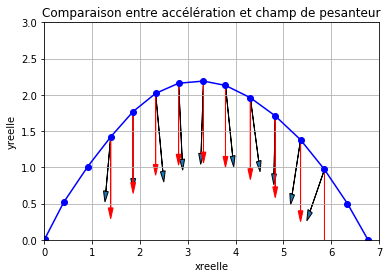

In [5]:
m=np.arange(1,len(t)-4)
for i in m :
    plt.arrow(x[i+2],y[i+2],0.1*axl[i],0.1*ayl[i],head_width=0.1)
# on fait tracer des vecteurs de positions initiales x[i+2],y[i+2], de coordonnées 0.1*axl[i] 
# et idem pour uy, avec une largeur de tête donnée
    plt.arrow(x[i+2],y[i+2],0*axl[i],0.1*(0*axl[i]-9.8),fc='r',ec='r',head_width=0.1)
# on fait tracer les vecteurs accélération théoriques (verticaux, de norme 9.8, avec une correction d'échelle 0.1)
plt.xlim(0,7) # les options de tracé sont classiques.
plt.ylim(0,3)
plt.grid()
plt.plot(x,y,'bo-')
plt.xlabel("xreelle")
plt.ylabel("yreelle")
plt.title("Comparaison entre accélération et champ de pesanteur")
plt.show()

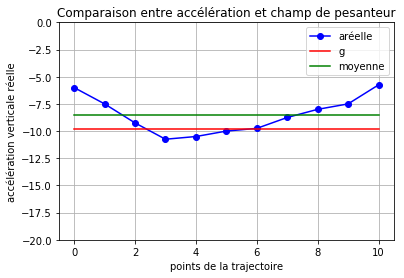

-8.5


In [6]:
m=np.arange(0,len(t)-4)
ath=0*m-9.8
mod=np.polyfit(m,ayl,0) # on fait modéliser la liste des accélérations verticales par une constante (polynôme d'ordre 0)
moda=0*m+mod[0] #on définit une fonction sur cette modélisation.
plt.plot(m,ayl,'bo-',label="aréelle")
plt.legend()
plt.grid()
plt.ylim(-20,0)
plt.plot(m,ath,'r-',label="g")
plt.legend()
plt.plot(m,moda,'g-',label="moyenne")
plt.legend()
plt.xlabel("points de la trajectoire")
plt.ylabel("accélération verticale réelle")
plt.title("Comparaison entre accélération et champ de pesanteur")
plt.show()
print(round(mod[0],1))